In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('CO2_Emissions_Canada.csv')
data.head() #here in this data set we are going to predict the co2 emission

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.shape

(7385, 12)

In [4]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
data.duplicated().sum()

1103

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [12]:
data['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [13]:
data['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [14]:
data['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [15]:
#for this data set onehot encoding is
#required coz it has none common, duplicate or NA values
#and the data set is ready to be converted into numerical values

In [16]:
data.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


<AxesSubplot:>

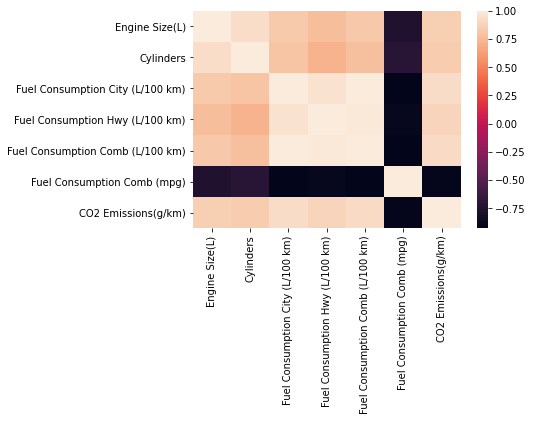

In [18]:
sns.heatmap(data.corr())

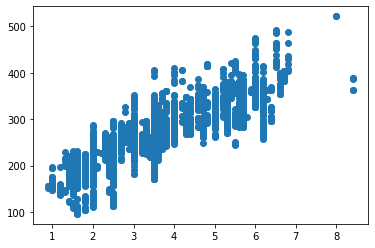

In [21]:
plt.scatter(data['Engine Size(L)'], data['CO2 Emissions(g/km)'])

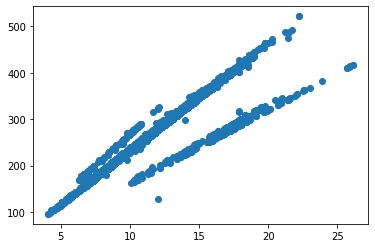

In [24]:
plt.scatter(data['Fuel Consumption Comb (L/100 km)'],data['CO2 Emissions(g/km)'])

In [27]:
# now we are using barplot coz we are comparing 2 numerical values

c:\users\prana\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

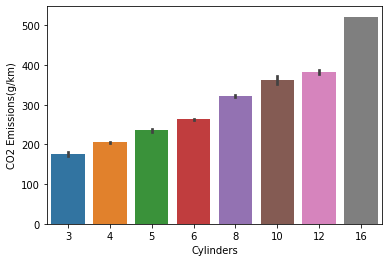

In [25]:
sns.barplot(data['Cylinders'],data['CO2 Emissions(g/km)'])

c:\users\prana\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

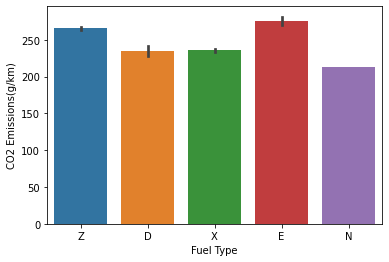

In [26]:
sns.barplot(data['Fuel Type'],data['CO2 Emissions(g/km)'])

c:\users\prana\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Transmission'>

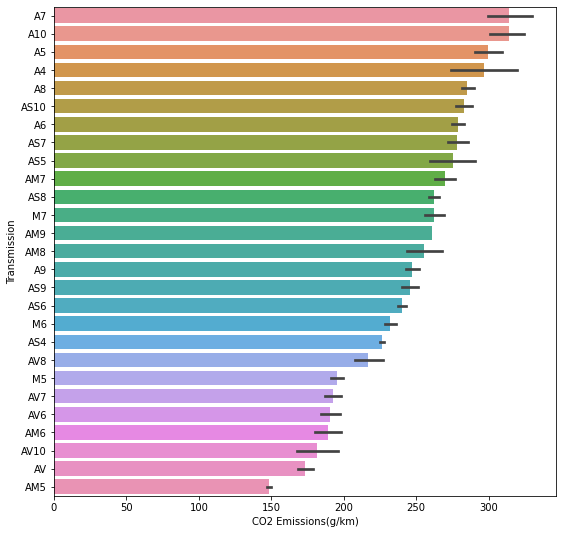

In [30]:
plt.figure(figsize=(9,9))
order = data.groupby(['Transmission']).mean().sort_values('CO2 Emissions(g/km)', ascending = False).index
sns.barplot(data['CO2 Emissions(g/km)'], data['Transmission'], order = order)

In [36]:
# in the above cell : groupby  will simply group data according to transmissoin types ( in this case)
# and order is a fuction to sort the values according to our need
# in the 2 nd line of the above cell we are sorting values acccording to co2 emmisions column

In [33]:
data.groupby(['Transmission']).mean()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Transmission,,,,,,,
A10,5.500000,7.642857,15.096429,10.750000,13.135714,21.928571,313.964286
A4,3.760656,6.163934,16.306557,12.549180,14.618033,22.688525,296.590164
A5,4.205128,6.410256,15.293590,10.678205,13.214103,21.807692,299.371795
A6,3.829094,6.108187,15.040936,10.705702,13.094591,23.236842,278.798246
A7,4.127273,7.590909,15.436364,11.081818,13.475000,21.477273,314.272727
A8,4.323280,6.888889,14.439153,10.025926,12.453175,23.335979,285.415344
A9,2.929278,5.486692,12.405703,8.878707,10.821673,26.714829,247.368821
AM5,1.000000,3.000000,6.850000,5.950000,6.450000,43.500000,148.500000
AM6,2.014019,4.158879,9.108411,6.994393,8.156075,37.429907,189.280374


In [35]:
data.mean()

C:\Users\prana\AppData\Local\Temp/ipykernel_3600/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Engine Size(L)                        3.161812
Cylinders                             5.618911
Fuel Consumption City (L/100 km)     12.610220
Fuel Consumption Hwy (L/100 km)       9.070583
Fuel Consumption Comb (L/100 km)     11.017876
Fuel Consumption Comb (mpg)          27.411016
CO2 Emissions(g/km)                 251.157752
dtype: float64

In [39]:
data.groupby(['Transmission']).mean().sort_values('CO2 Emissions(g/km)', ascending = False).index

Index(['A7', 'A10', 'A5', 'A4', 'A8', 'AS10', 'A6', 'AS7', 'AS5', 'AM7', 'AS8',
       'M7', 'AM9', 'AM8', 'A9', 'AS9', 'AS6', 'M6', 'AS4', 'AV8', 'M5', 'AV7',
       'AV6', 'AM6', 'AV10', 'AV', 'AM5'],
      dtype='object', name='Transmission')

In [40]:
cols = ['Vehicle Class','Transmission','Fuel Type','Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)']
X = data[cols]
Y = data[['CO2 Emissions(g/km)']]
X.head(10)

,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,COMPACT,AS5,Z,2.0,4,8.5
1,COMPACT,M6,Z,2.4,4,9.6
2,COMPACT,AV7,Z,1.5,4,5.9
3,SUV - SMALL,AS6,Z,3.5,6,11.1
4,SUV - SMALL,AS6,Z,3.5,6,10.6
5,MID-SIZE,AS6,Z,3.5,6,10.0
6,MID-SIZE,AS6,Z,3.5,6,10.1
7,MID-SIZE,AS6,Z,3.7,6,11.1
8,MID-SIZE,M6,Z,3.7,6,11.6
9,COMPACT,AS5,Z,2.4,4,9.2


In [41]:
Y

,CO2 Emissions(g/km)
0,196
1,221
2,136
3,255
4,244
...,...
7380,219
7381,232
7382,240
7383,232


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['Engine Size(L)', 'Cylinders','Fuel Consumption Comb (L/100 km)']
X[cols] = sc.fit_transform(X[cols])   # in this cell the data is converted as mean is 0 and step deviation 1 and variance as 1

c:\users\prana\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [46]:
from sklearn.preprocessing import OrdinalEncoder  #we use ordinalencoder instead of labelencoder coz we want to convert multiple aplhabetical columns to numerical
oe = OrdinalEncoder()
cols = ['Vehicle Class','Transmission', 'Fuel Type']
X[cols] = oe.fit_transform(X[cols])             #here we convert alpha betical data to numerical

c:\users\prana\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [47]:
X.head(10)

,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,0.0,14.0,4.0,-0.851086,-0.876934,-0.854490
1,0.0,25.0,4.0,-0.558066,-0.876934,-0.481184
2,0.0,22.0,4.0,-1.217362,-0.876934,-1.736851
3,11.0,15.0,4.0,0.247740,0.206429,0.027870
4,11.0,15.0,4.0,0.247740,0.206429,-0.141815
5,2.0,15.0,4.0,0.247740,0.206429,-0.345436
6,2.0,15.0,4.0,0.247740,0.206429,-0.311499
7,2.0,15.0,4.0,0.394251,0.206429,0.027870
8,2.0,25.0,4.0,0.394251,0.206429,0.197555
9,0.0,14.0,4.0,-0.558066,-0.876934,-0.616932


In [48]:
#now on to the next step train test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 5)

In [49]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train) #after this cell executes we are done training our model

LinearRegression()

In [50]:
lin_reg.score(x_test,y_test)#here we are testing our model on random data

0.9083364731173277

In [51]:
lin_reg.score(x_train,y_train) # here we are running our model on trained data

0.901183282226897

In [52]:
result = lin_reg.predict(X)

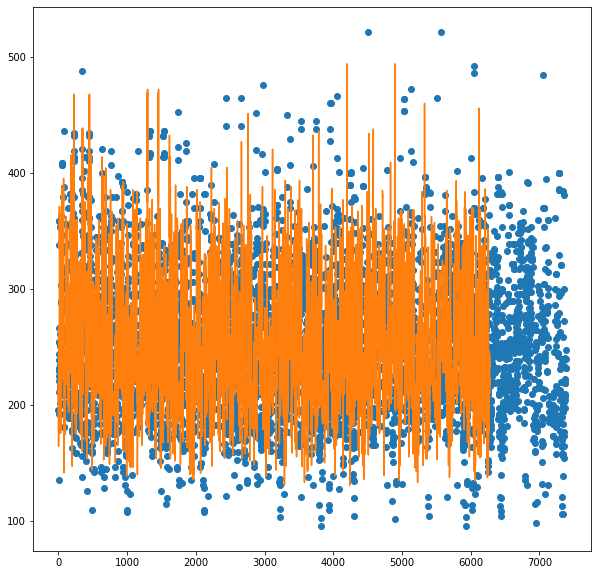

In [54]:
plt.figure(figsize = (10,10))
plt.plot(Y, 'o')
plt.plot(result)

In [55]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train,y_train)

Ridge()

In [56]:
ridge_reg.score(x_test,y_test)

0.9083360744638524

In [57]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train,y_train)

Lasso()

In [58]:
lasso_reg.score(x_test,y_test)

0.9062519113530543